In [3]:
% matplotlib inline
import pylab as plt
import numpy as np
import networkx as nx
import pandas as pd
import operator
import os
import re
from glob import glob
import os
os.chdir('/home/jagust/dino/surf/')
import util as util
import modularity as md
from scipy import stats
import operator
from surf import *

In [4]:
# Load Functional Matrices Paths and Other Relevant Data
globstr = "/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/*"
mat_paths = sorted(glob(globstr))
incl_paths = np.load('/home/jagust/dino/surf/inclusion_mat_paths.npy')

geno_pos = np.load('/home/jagust/dino/surf/geno_pos.npy')
geno_neg = np.load('/home/jagust/dino/surf/geno_neg.npy')

In [13]:
# Metrics to look at for individual networks: Degree, modularity, efficiency, clustering coefficient
# Note: since modularity algorithm isn't ready, add later
pos_vals = {'deg': [], 'avg_deg' : [], 'mod' : [], 'eff' : [], 'clust' : []}
neg_vals = {'deg': [], 'avg_deg' : [], 'mod' : [], 'eff' : [], 'clust' : []}
for path in incl_paths:
    subid = find_id(str(path))
    g = nx.Graph(np.load(str(path)))
    # Remove Negative Weights
    remove_neg_weights(g)
    
    # Add Distance Attribute to Edges
    add_distance_attr(g)
    
    # Find Total Degree
    d = sum(g.degree(weight='weight').values())

    # Find Average Degree
    ad = np.mean(np.array(g.degree(weight='weight').values()))
    
    # Find Efficiency
    e = find_eff(g)
    #e = 1.0 / nx.average_shortest_path_length(g, weight='distance')
    
    #Find Communicability
    c = nx.communicability
    
    if subid in geno_pos:
        pos_vals['deg'].append(d)
        pos_vals['avg_deg'].append(ad)
        pos_vals['eff'].append(e)
    elif subid in geno_neg:
        neg_vals['deg'].append(d)
        neg_vals['avg_deg'].append(ad)
        neg_vals['eff'].append(e)

D: 0.172531715389
 p: 0.17959382723


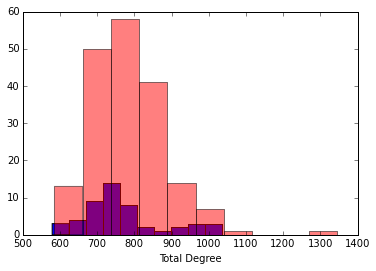

In [29]:
plt.hist(pos_vals['deg'], color = 'b')
plt.hist(neg_vals['deg'], color = 'r', alpha = 0.5)
plt.xlabel("Total Degree")

d_degree, p_degree = stats.ks_2samp(pos_vals['deg'], neg_vals['deg'])
print "D: " + str(d_degree)
print" p: " + str(p_degree)

D: 0.172531715389
 p: 0.17959382723


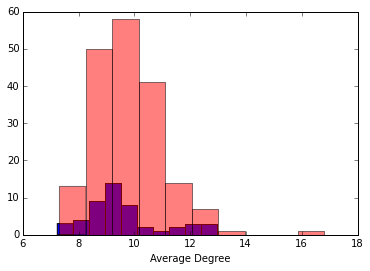

In [32]:
plt.hist(pos_vals['avg_deg'], color = 'b')
plt.hist(neg_vals['avg_deg'], color = 'r', alpha = 0.5)
plt.xlabel("Average Degree")

d_avg_degree, p_avg_degree = stats.ks_2samp(pos_vals['avg_deg'], neg_vals['avg_deg'])
print "D: " + str(d_avg_degree)
print" p: " + str(p_avg_degree)

D: 0.143629343629
 p: 0.374046437684


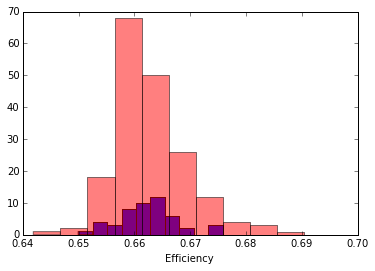

In [31]:
plt.hist(pos_vals['eff'], color = 'b')
plt.hist(neg_vals['eff'], color = 'r', alpha = 0.5)
plt.xlabel("Efficiency")

d_eff, p_eff = stats.ks_2samp(pos_vals['eff'], neg_vals['eff'])
print "D: " + str(d_eff)
print" p: " + str(p_eff)

In [10]:
def remove_neg_weights(g):
    for e in g.edges(data=True):
        if e[2]['weight'] < 0.0:
            g.remove_edge(e[0], e[1])
        if e[2]['weight'] != e[2]['weight']:
            g.remove_edge(e[0], e[1])